# Appendix A.1 - Slow Roll plots against Planck Data

Here we plot known SR inflation predictions for $r$ and $n_s$ against data from the Planck Legacy Archive file

COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00.zip,

accessed 29/10/2020

In [2]:
import matplotlib.pyplot as py
import numpy as np
import getdist as gs
import os
from getdist import plots, loadMCSamples
from pathlib import Path

In [3]:
#paths are written as the following
pathbase = "C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE"
dirs = os.listdir(pathbase)
#os.listdir returns a list of strings
dirs[2], dirs[10]

('base_r_plikHM_TTTEEE_lowl_lowE.likelihoods',
 'base_r_plikHM_TTTEEE_lowl_lowE_1.txt')

In [4]:
basepth = "C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE"
root = "base_r_plikHM_TTTEEE_lowl_lowE"

samps = loadMCSamples(os.path.join(basepth, root), settings={'ignore_rows':0.3})

In [7]:
samps

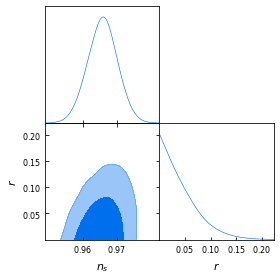

In [5]:
g = plots.get_subplot_plotter()
g.triangle_plot(samps, ['ns', 'r'], filled=True)

In [5]:
g.export('marginals.png')
#only run to save triangle plot

Now we will add the known $r$ and $n_s$ paths for a range of $N$ values corresponding to sensible times at the beginning of inflation

In [6]:
Nrange = [N for N in range(60, 71)]

def params_for_k(k):
    ns = []
    r = []
    for N in Nrange:
        ns.append(1 - (0.5*k+1)/(N + 0.25*k))
        r.append((4*k)/(N+0.5))
    return (ns, r)

def plot_for_k(k, kstring = None, star = True):
    py.plot(params_for_k(k)[0], params_for_k(k)[1], label =  kstring)
    if star:
        py.plot(params_for_k(k)[0][0], params_for_k(k)[1][0], '*')
#asterisks mark the point on each k interval corresponding to N = 60

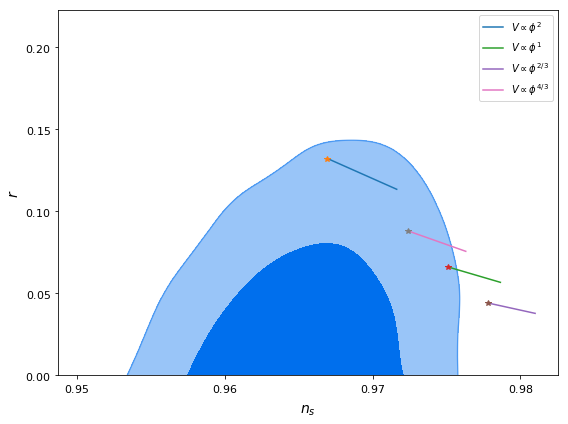

In [10]:
g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=8)
g.plot_2d(samps,'ns', 'r', filled=True);

plot_for_k(2, '$V \propto \phi ^{2}$')
plot_for_k(1, '$V \propto \phi ^{1}$')
plot_for_k(2/3, '$V \propto \phi ^{2/3}$')
plot_for_k(4/3, '$V \propto \phi ^{4/3}$')

py.legend()

In [8]:
g.export('SRcomparison.png')

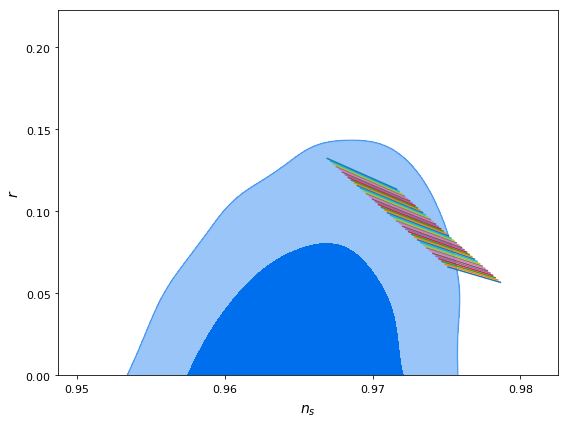

In [9]:
g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=8)
g.plot_2d(samps,'ns', 'r', filled=True);

for k in np.linspace(1, 2, 41):
    plot_for_k(k, star = False)
    


In [10]:
g.export('SRcomparison_with_k_spectrum.png')

Text(0, 0.5, '$r$')

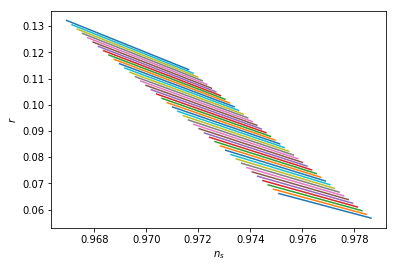

In [11]:
for k in np.linspace(1, 2, 41):
    plot_for_k(k, star = False)
py.xlabel('$n_s$')
py.ylabel('$r$')

In [12]:
g.export('SRkspectrum.png')